<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=256563452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz
%pip install xlearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 96.2 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is 

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 27.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 27.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 79.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 126.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 142.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
#%pip freeze > requirements.txt

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML
import xlearn as xl

In [7]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [8]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [9]:
!ls /kaggle/input/playground-series-s5e8

sample_submission.csv  test.csv  train.csv


In [10]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [11]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [13]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [15]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


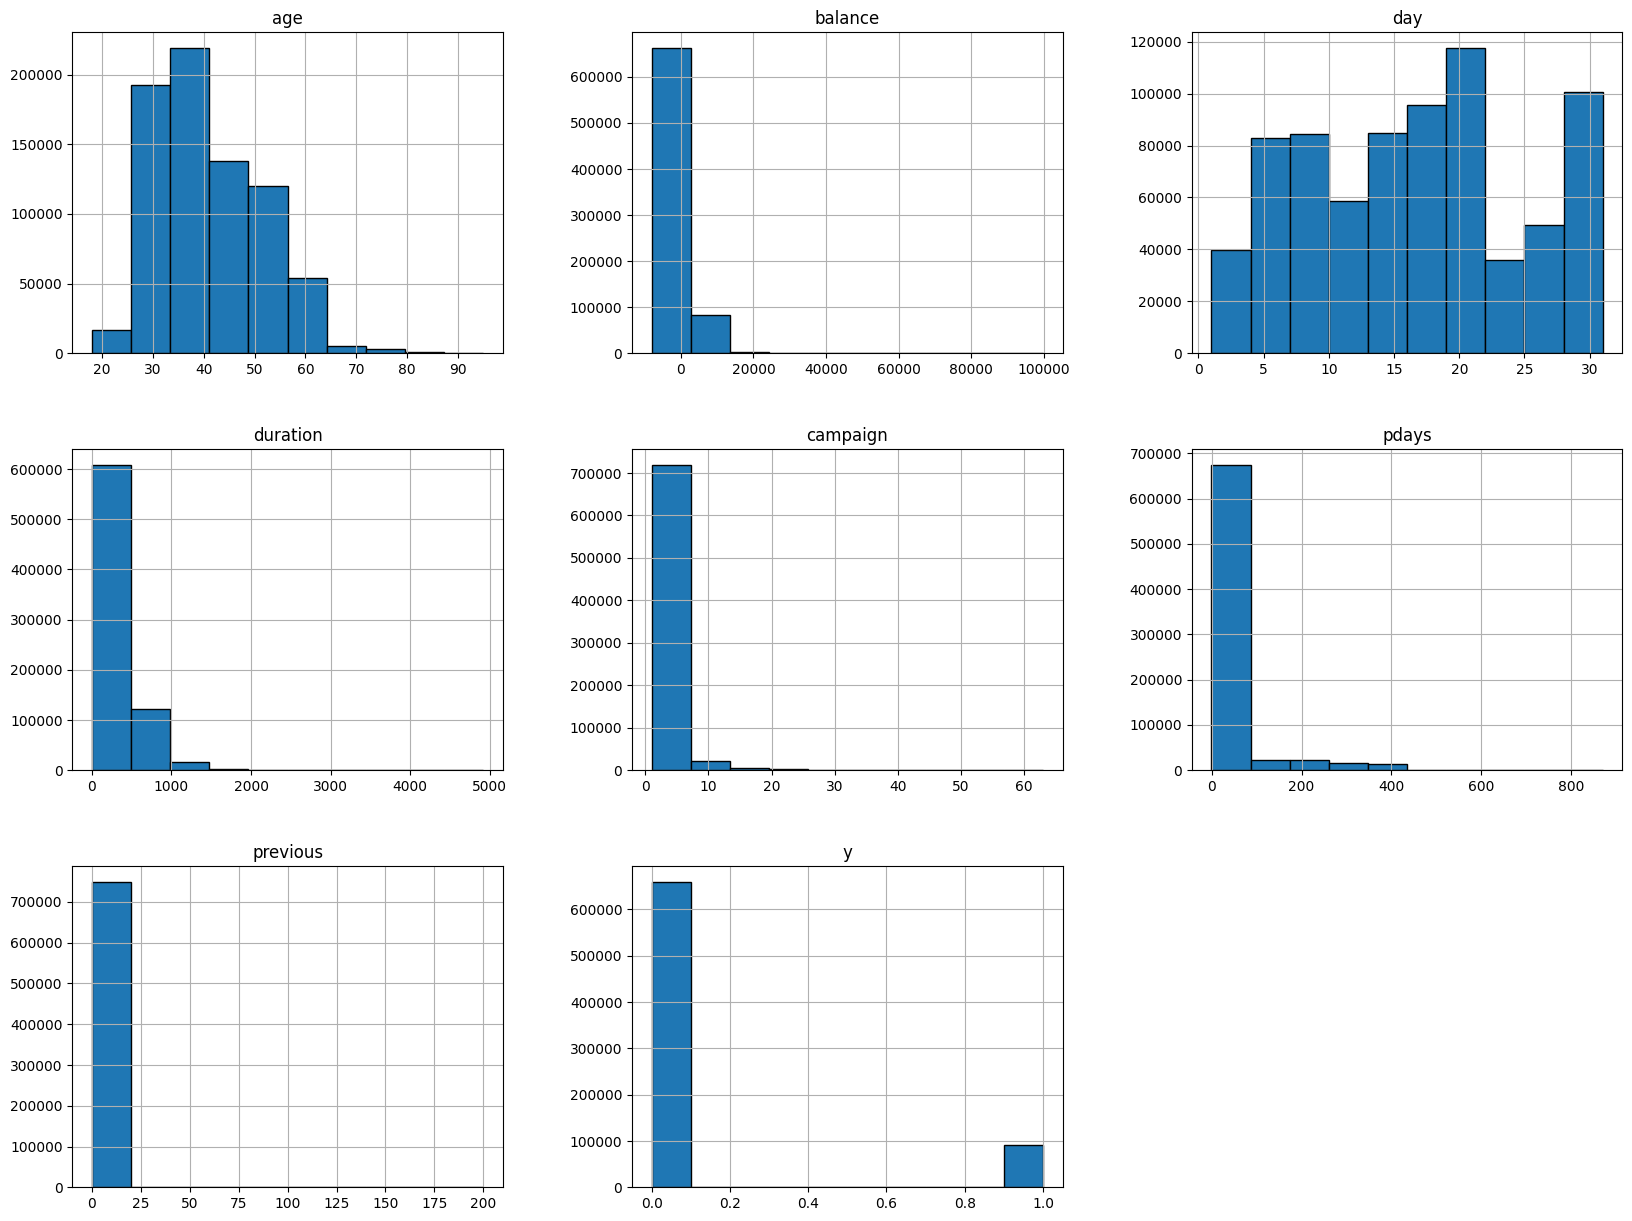

In [16]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [17]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [18]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [19]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [20]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [21]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [22]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [23]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
715524,8,3,2,1,2,1,1,10,4,-0.983156,-0.013746,0.592228,-0.576671,-0.579978,-0.302686,-0.226356
392803,2,2,2,1,2,1,1,6,4,0.900362,1.309354,-0.862644,-0.723346,-0.579978,-0.302686,-0.226356
527338,2,2,1,1,2,1,1,9,4,0.900362,-0.972704,-0.620165,-0.888356,0.891493,-0.302686,-0.226356
433194,11,2,2,1,2,1,3,9,4,0.008169,1.184334,-0.256447,-0.305321,-0.212110,-0.302686,-0.226356
719746,5,3,3,1,2,1,1,9,4,0.008169,0.004214,-0.135208,-0.356658,0.155758,-0.302686,-0.226356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705113,10,2,2,1,2,1,3,7,4,0.008169,-0.197579,-1.711319,0.948754,-0.579978,-0.302686,-0.226356
161834,1,2,2,1,2,1,3,9,4,0.404699,-0.466636,-0.256447,0.318050,0.523625,-0.302686,-0.226356
650010,4,2,2,1,1,1,2,2,4,1.197760,-0.156023,-0.256447,2.609854,-0.212110,-0.302686,-0.226356


Below we define a function to help us do stratified kfold cross validation which we use below

In [24]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## FFMS

## Neural Networks

In [25]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.02290867641568184, valley=0.0020892962347716093)

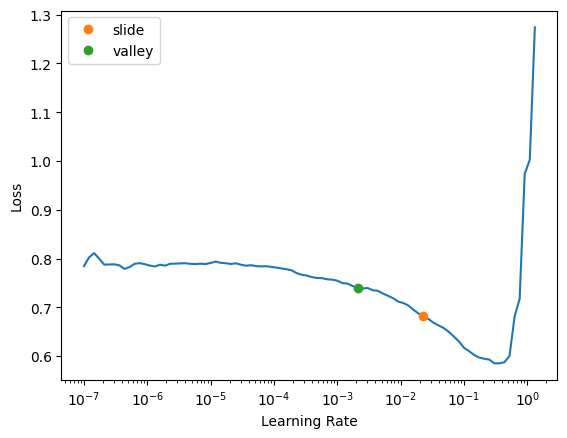

In [26]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [27]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.177203,0.163577,0.958056,01:32
1,0.156699,0.158613,0.960443,01:31


CPU times: user 3min 1s, sys: 1.46 s, total: 3min 3s
Wall time: 3min 3s


In [28]:
dl = test_dl

In [29]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [30]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [31]:
a_preds.shape

torch.Size([250000, 2])

In [32]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [33]:
nn_preds_x

tensor([[9.9976e-01, 2.4227e-04],
        [7.7484e-01, 2.2516e-01],
        [9.9080e-01, 9.1968e-03],
        ...,
        [9.9920e-01, 8.0192e-04],
        [9.1388e-01, 8.6118e-02],
        [9.9620e-01, 3.8015e-03]])

In [34]:
nn_preds_y

tensor([[9.9499e-01, 5.0053e-03],
        [6.5916e-01, 3.4085e-01],
        [9.9983e-01, 1.6931e-04],
        ...,
        [2.0585e-01, 7.9415e-01],
        [9.9801e-01, 1.9861e-03],
        [7.3685e-01, 2.6315e-01]])

In [35]:
a_preds

tensor([[9.9499e-01, 5.0053e-03],
        [6.5916e-01, 3.4085e-01],
        [9.9983e-01, 1.6931e-04],
        ...,
        [2.0585e-01, 7.9415e-01],
        [9.9801e-01, 1.9861e-03],
        [7.3685e-01, 2.6315e-01]])

In [36]:
nn_preds_proba

tensor([5.0053e-03, 3.4085e-01, 1.6931e-04,  ..., 7.9415e-01, 1.9861e-03,
        2.6315e-01])

In [37]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([5.0053e-03, 3.4085e-01, 1.6931e-04,  ..., 7.9415e-01, 1.9861e-03,
        2.6315e-01])

In [38]:
final_preds.shape

torch.Size([250000])

In [39]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.005005
750001,0.340845
750002,0.000169
750003,0.000062
750004,0.019210
...,...
999995,0.000184
999996,0.130890
999997,0.794150


## Decision Trees

### Random Forests

In [40]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 2min 21s, sys: 301 ms, total: 2min 21s
Wall time: 2min 21s


0.9641311961868083

In [41]:
rf_preds_probs,rf_preds_probs.shape

(tensor([2.5558e-05, 1.2996e-01, 0.0000e+00,  ..., 7.2565e-01, 4.2896e-03,
         7.1840e-02]),
 torch.Size([250000]))

In [42]:
rf_preds_probs 

tensor([2.5558e-05, 1.2996e-01, 0.0000e+00,  ..., 7.2565e-01, 4.2896e-03,
        7.1840e-02])

In [43]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [44]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.464482
10,balance,0.096093
7,month,0.068630
9,age,0.067130
11,day,0.056374
8,poutcome,0.044511
4,housing,0.037068
14,pdays,0.033089
6,contact,0.030059
0,job,0.026478


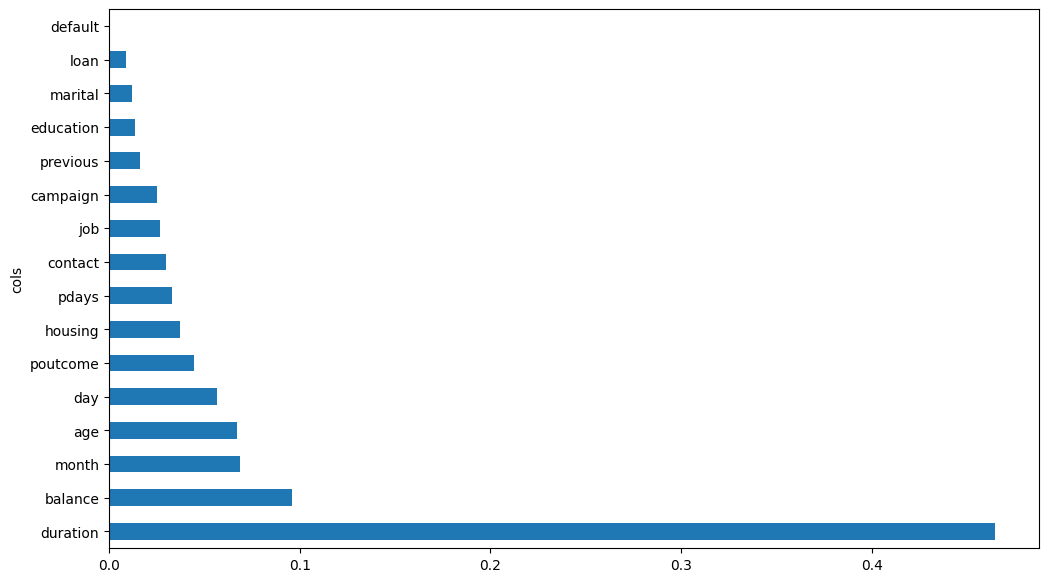

In [45]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [46]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [47]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.964390
Training fold 2/5...
Fold 2 roc_auc: 0.962733
Training fold 3/5...
Fold 3 roc_auc: 0.963368
Training fold 4/5...
Fold 4 roc_auc: 0.963707
Training fold 5/5...
Fold 5 roc_auc: 0.962988

Mean roc_auc: 0.963437


In [48]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [49]:
rf_oof_predictions

array([3.55441240e-04, 0.00000000e+00, 0.00000000e+00, ..., 6.96733258e-01, 2.63234179e-01, 4.81044845e-03])

In [50]:
rf_test_predictions

array([0.00112123, 0.20480801, 0.01317857, ..., 0.00227636, 0.05787834, 0.02105246])

In [51]:
rf_mean_score, rf_fold_scores

(0.9634371000121531,
 [0.9643897159212204,
  0.9627326471140729,
  0.9633678188866083,
  0.9637071333981835,
  0.9629881847406809])

In [52]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000026
750001,0.129958
750002,0.000000
750003,0.000000
750004,0.062116
...,...
999995,0.000000
999996,0.126339
999997,0.725650


## Gradient Boosting

### XGBoost

In [53]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 7.58 s, sys: 32 ms, total: 7.61 s
Wall time: 3.95 s


0.9661237214874685

In [54]:
xgb_preds_proba

tensor([1.7564e-03, 7.2431e-02, 2.7562e-04,  ..., 9.3136e-01, 3.8234e-04,
        1.5725e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

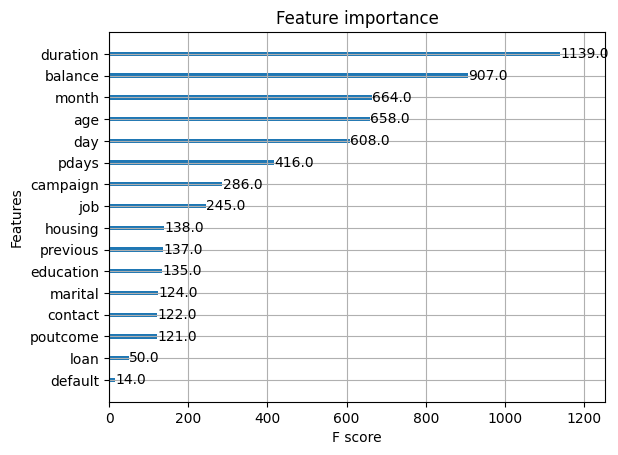

In [55]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [56]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.966705
Training fold 2/5...
Fold 2 roc_auc: 0.965855
Training fold 3/5...
Fold 3 roc_auc: 0.965954
Training fold 4/5...
Fold 4 roc_auc: 0.965681
Training fold 5/5...
Fold 5 roc_auc: 0.965641

Mean roc_auc: 0.965967


In [58]:
xgb_oof_predictions

array([1.45176251e-03, 7.59968185e-04, 1.77344758e-04, ..., 5.94320774e-01, 2.24823564e-01, 4.24272148e-03])

In [59]:
xgb_test_predictions

array([0.00173915, 0.18134326, 0.00167858, ..., 0.00175599, 0.02774961, 0.00299369])

In [60]:
xgb_mean_score

0.9659672183694896

In [61]:
 xgb_fold_scores

[0.9667053816743235,
 0.9658549636573546,
 0.9659539645057684,
 0.9656812707523806,
 0.9656405112576213]

In [62]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001756
750001,0.072431
750002,0.000276
750003,0.000061
750004,0.023799
...,...
999995,0.000228
999996,0.082071
999997,0.931362


### LGBM

In [63]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72477, number of negative: 527523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120795 -> initscore=-1.984923
[LightGBM] [Info] Start training from score -1.984923
CPU times: user 12.8 s, sys: 74.9 ms, total: 12.8 s
Wall time: 6.61 s


0.9648797817778215

In [64]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[9.9674e-01, 3.2595e-03],
         [8.5745e-01, 1.4255e-01],
         [9.9888e-01, 1.1234e-03],
         ...,
         [3.0033e-01, 6.9967e-01],
         [9.9922e-01, 7.8492e-04],
         [8.8736e-01, 1.1264e-01]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

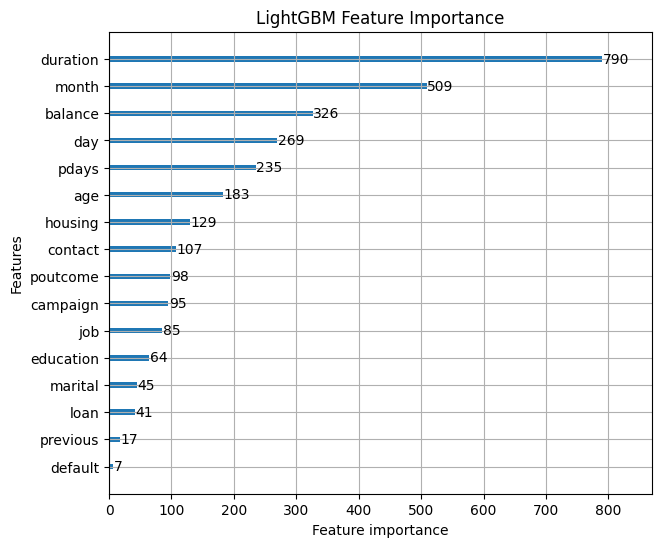

In [65]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [66]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [67]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 57982, number of negative: 422018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120796 -> initscore=-1.984915
[LightGBM] [Info] Start training from score -1.984915
Fold 1 roc_auc: 0.965312
Training fold 2/5...
[LightGBM] [Info] Number of positive: 57982, number of negative: 422018
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points i

In [68]:
lgbm_oof_predictions

array([0.00327036, 0.00118833, 0.00104924, ..., 0.62467023, 0.11629857, 0.00105762])

In [69]:
lgbm_test_predictions

array([0.00181322, 0.24521977, 0.001386  , ..., 0.00138695, 0.04844182, 0.00615839])

In [70]:
 lgbm_mean_score

0.9646462218869057

In [71]:
lgbm_fold_scores

[0.9653119238817874,
 0.9640478734326581,
 0.9645997224963092,
 0.9647845363672432,
 0.964487053256531]

In [72]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003259
750001,0.142550
750002,0.001123
750003,0.000643
750004,0.032429
...,...
999995,0.000354
999996,0.092244
999997,0.699666


### CatBoost

In [73]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 4min 1s, sys: 9.21 s, total: 4min 11s
Wall time: 1min 3s


0.9671104598079825

#### CatBoost Feature Importance

In [74]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   46.424270
6    contact   10.495766
7      month   10.187074
10   balance    7.592451
4    housing    5.396292
11       day    4.555875
9        age    2.499002
13  campaign    2.305546
14     pdays    2.296593
8   poutcome    2.133135


#### Cross validation - CatBoost

In [75]:
cat_model = CatBoostClassifier()
cat_model

In [76]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4847009	total: 54ms	remaining: 54s
1:	learn: 0.3673981	total: 104ms	remaining: 51.9s
2:	learn: 0.3007978	total: 153ms	remaining: 50.8s
3:	learn: 0.2617878	total: 202ms	remaining: 50.3s
4:	learn: 0.2394881	total: 249ms	remaining: 49.5s
5:	learn: 0.2255787	total: 302ms	remaining: 50.1s
6:	learn: 0.2155193	total: 354ms	remaining: 50.2s
7:	learn: 0.2076080	total: 401ms	remaining: 49.7s
8:	learn: 0.2031505	total: 452ms	remaining: 49.7s
9:	learn: 0.1992236	total: 500ms	remaining: 49.5s
10:	learn: 0.1962200	total: 548ms	remaining: 49.3s
11:	learn: 0.1937181	total: 593ms	remaining: 48.8s
12:	learn: 0.1917350	total: 646ms	remaining: 49s
13:	learn: 0.1898194	total: 698ms	remaining: 49.2s
14:	learn: 0.1878942	total: 749ms	remaining: 49.2s
15:	learn: 0.1864793	total: 797ms	remaining: 49s
16:	learn: 0.1853161	total: 846ms	remaining: 48.9s
17:	learn: 0.1843635	total: 897ms	remaining: 48.9s
18:	learn: 0.1835212	total: 953ms	remaining: 49.

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [77]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([3.2485e-03, 8.8909e-02, 2.0829e-04,  ..., 7.9540e-01, 4.3616e-04,
        1.6049e-01])

In [78]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([0.0020, 0.2494, 0.0021,  ..., 0.0024, 0.0284, 0.0041])

In [79]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9673250809742395

#### CatBoost + LGBM

In [80]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([4.0000e-03, 1.2397e-01, 6.3220e-04,  ..., 6.7955e-01, 6.3746e-04,
        1.3818e-01])

In [81]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [82]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9669952472501572

#### XGBoost + LGBM

In [83]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([2.5079e-03, 1.0749e-01, 6.9953e-04,  ..., 8.1551e-01, 5.8363e-04,
        1.3494e-01])

In [84]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9664026881160891

In [85]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002508
750001,0.107490
750002,0.000700
750003,0.000352
750004,0.028114
...,...
999995,0.000291
999996,0.087157
999997,0.815514


#### CatBoost + LGBM + XGBoost

In [86]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([3.2521e-03, 1.0679e-01, 5.1334e-04,  ..., 7.6349e-01, 5.5242e-04,
        1.4454e-01])

In [87]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9671967553870168

### Stacking

In [88]:
stacking_estimators = [
    ('cat_boost',cat_model),
    #('rf',rf_model),
    ('lgbm',lgbm_model),
    ('xgb',xgb_model),
]

#stacking_classifier_cat_xgb_lgbm= StackingClassifier(
    #estimators=stacking_estimators,
    #final_estimator=LogisticRegression(),
    #cv=5
#)
stacking_classifier_cat_lgbm= StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=lgb.LGBMClassifier(),
    cv=5
)
stacking_classifier_cat_lgbm.fit(X_train, y_train)


stacking_preds_cat_lgbm = (stacking_classifier_cat_lgbm.predict_proba(test_dl.xs))[:,1]
stacking_preds_cat_lgbm_x = (stacking_classifier_cat_lgbm.predict_proba(X_test))[:,1]

stacking_score_cat_lgbm = roc_auc_score(y_test, stacking_preds_cat_lgbm_x)

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

Learning rate set to 0.158199
0:	learn: 0.4677075	total: 77.2ms	remaining: 1m 17s
1:	learn: 0.3463604	total: 144ms	remaining: 1m 11s
2:	learn: 0.2867355	total: 208ms	remaining: 1m 9s
3:	learn: 0.2525752	total: 272ms	remaining: 1m 7s
4:	learn: 0.2329629	total: 334ms	remaining: 1m 6s
5:	learn: 0.2200270	total: 401ms	remaining: 1m 6s
6:	learn: 0.2107949	total: 475ms	remaining: 1m 7s
7:	learn: 0.2047742	total: 542ms	remaining: 1m 7s
8:	learn: 0.1994554	total: 604ms	remaining: 1m 6s
9:	learn: 0.1963378	total: 675ms	remaining: 1m 6s
10:	learn: 0.1932724	total: 739ms	remaining: 1m 6s
11:	learn: 0.1909638	total: 802ms	remaining: 1m 6s
12:	learn: 0.1886338	total: 869ms	remaining: 1m 6s
13:	learn: 0.1869115	total: 929ms	remaining: 1m 5s
14:	learn: 0.1856575	total: 999ms	remaining: 1m 5s
15:	learn: 0.1836521	total: 1.07s	remaining: 1m 5s
16:	learn: 0.1824186	total: 1.13s	remaining: 1m 5s
17:	learn: 0.1816875	total: 1.19s	remaining: 1m 4s
18:	learn: 0.1802424	total: 1.25s	remaining: 1m 4s
19:	lear

In [89]:
stacking_preds_cat_lgbm.shape

(250000,)

In [90]:
stacking_preds_cat_lgbm = torch.tensor(stacking_preds_cat_lgbm)

In [91]:
stacking_preds_cat_lgbm

tensor([1.3255e-03, 7.8595e-02, 2.1483e-04,  ..., 7.8229e-01, 4.5854e-05,
        1.3808e-01], dtype=torch.float64)

In [92]:
!rm submission.csv
sub_df['y'] = stacking_preds_cat_lgbm 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001326
750001,0.078595
750002,0.000215
750003,0.000023
750004,0.024935
...,...
999995,0.000045
999996,0.069925
999997,0.782287


## AutoML

### AutoGluon

In [93]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
#Time_limit = 3600*10
Time_limit = 3600
problem_type='binary'

In [94]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={'num_gpus': 2}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250818_071650"
2025-08-18 07:16:51,258	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-18 07:16:54,706	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=1640) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 warning generated.
(_ray_fit pid=1640) 1 

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.967758     roc_auc     335.857483  2071.087758                0.125107          25.414506            3       True          9
1          LightGBM_BAG_L2   0.967602     roc_auc     315.772094  1886.223197                5.201655         152.548469            2       True          7
2        LightGBMXT_BAG_L2   0.967127     roc_auc     340.861122  2115.995899               30.290683         382.321171            2       True          6
3  RandomForestGini_BAG_L2   0.966994     roc_auc     330.530720  1893.124783               19.960281         159.450055            2       True          8
4      WeightedEnsemble_L2   0.966542     roc_auc     305.552185  1710.180946                0.130800          14.718486            2       True          5
5 

In [95]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [96]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.967758     roc_auc     335.857483  2071.087758                0.125107          25.414506            3       True          9
1          LightGBM_BAG_L2   0.967602     roc_auc     315.772094  1886.223197                5.201655         152.548469            2       True          7
2        LightGBMXT_BAG_L2   0.967127     roc_auc     340.861122  2115.995899               30.290683         382.321171            2       True          6
3  RandomForestGini_BAG_L2   0.966994     roc_auc     330.530720  1893.124783               19.960281         159.450055            2       True          8
4      WeightedEnsemble_L2   0.966542     roc_auc     305.552185  1710.180946                0.130800          14.718486            2       True          5
5 

In [97]:
%%time
predictor.leaderboard()

CPU times: user 5.77 ms, sys: 21 µs, total: 5.79 ms
Wall time: 5.3 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.967758,roc_auc,335.857483,2071.087758,0.125107,25.414506,3,True,9
1,LightGBM_BAG_L2,0.967602,roc_auc,315.772094,1886.223197,5.201655,152.548469,2,True,7
2,LightGBMXT_BAG_L2,0.967127,roc_auc,340.861122,2115.995899,30.290683,382.321171,2,True,6
3,RandomForestGini_BAG_L2,0.966994,roc_auc,330.530720,1893.124783,19.960281,159.450055,2,True,8
4,WeightedEnsemble_L2,0.966542,roc_auc,305.552185,1710.180946,0.130800,14.718486,2,True,5
5,LightGBMXT_BAG_L1,0.966284,roc_auc,300.383848,1694.305955,300.383848,1694.305955,1,True,3
6,LightGBM_BAG_L1,0.940498,roc_auc,0.288401,36.911115,0.288401,36.911115,1,True,4
7,KNeighborsDist_BAG_L1,0.876041,roc_auc,5.037536,1.156505,5.037536,1.156505,1,True,2
8,KNeighborsUnif_BAG_L1,0.875218,roc_auc,4.860653,1.301153,4.860653,1.301153,1,True,1


In [98]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

CPU times: user 14min 7s, sys: 1.71 s, total: 14min 8s
Wall time: 7min 1s


,0,1
id,,
750000,0.996990,0.003010
750001,0.899281,0.100719
750002,0.999283,0.000717
750003,0.999446,0.000554
750004,0.987847,0.012153


In [99]:
predictions = autogluon_preds_proba

In [100]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

CPU times: user 14min 15s, sys: 1.76 s, total: 14min 17s
Wall time: 7min 6s


id
750000    0.003010
750001    0.100719
750002    0.000717
750003    0.000554
750004    0.012153
Name: y, dtype: float32

In [101]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [102]:
autogluon_preds_proba.values

array([3.0097617e-03, 1.0071872e-01, 7.1706605e-04, ..., 7.6342261e-01, 1.1812754e-03, 1.3690576e-01], dtype=float32)

In [103]:
autogluon_preds_proba_values = torch.tensor(autogluon_preds_proba.values)

In [104]:
autogluon_cat_lgbm_xgb_preds = (cat_lgbm_xgb_preds + autogluon_preds_proba_values)/2
autogluon_cat_lgbm_xgb_preds,autogluon_cat_lgbm_xgb_preds.shape

(tensor([3.1310e-03, 1.0375e-01, 6.1520e-04,  ..., 7.6346e-01, 8.6685e-04,
         1.4072e-01]),
 torch.Size([250000]))

In [105]:
!rm submission.csv
sub_df['y'] = autogluon_cat_lgbm_xgb_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003131
750001,0.103754
750002,0.000615
750003,0.000397
750004,0.022328
...,...
999995,0.000437
999996,0.114527
999997,0.763456


In [106]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [107]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [108]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.967325
7,CatBoost_XGB_LGBM_average,0.967197
3,CatBoost,0.967110
5,CatBoost_LGBM_average,0.966995
6,XGB_LGBM_average,0.966403
1,XGBoost,0.966124
2,LGBM,0.964880
0,Random Forest,0.964131


In [109]:
(autogluon_preds_proba.values).shape

(250000,)